# Introduction to Data Science
## Homework 3 Solutions

Student Name: Arnav Shah

Student Netid: ads798
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer
from pandas import Series 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv(r'D:\Users\DELL\Desktop\FDS\data\cell2cell_data.csv')


abc =np.random.rand(len(df)) <=0.8

train_df = df[abc]

test_df = df[~abc]
a=len(train_df)
b=len(test_df)
print (a)
print (b)



#loading and splitting the data into training and testing datasets

31855
8004


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

The selection bias can be present in the train and test datasets due to small sizes or human errors such as typos etc in the data set. Also we know that, if for a given i, being in sample is independent of Xi and Yi values, then the sample is not biased and we have a random sample. So in our case we can build a model to predict with train and test split datasets. A classifier can be built and target variable can be predicted. We can prove our example as random if there is no bias present. Tests such as calculating the accuracy of the model, if model results AUC>=0.5, we can prove our sample to be random.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [2]:
# as=df[['revenue', 'churn']].corr()
# print(as)

X=train_df.values[:,0:11]
Y=train_df.values[:,11]
ads = DecisionTreeClassifier(criterion = "entropy")
final=ads.fit(X,Y)
final
 #Building the decision tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

classifier = DecisionTreeClassifier()
classifier.fit(features, labels)


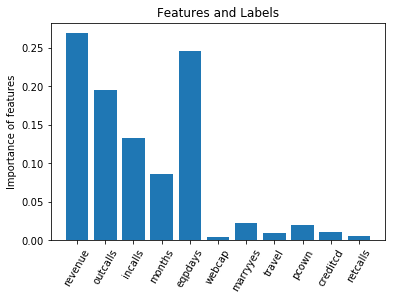

In [3]:

p=ads.feature_importances_
p

objects = [x for x in train_df.iloc[:,0:-1].columns.values]

y_pos = np.arange(len(objects))
performance = p
# y_pos
 
plt.bar(y_pos, performance)
plt.figure(1)
plt.xticks(y_pos, objects,rotation =60)
plt.ylabel('Importance of features')
plt.title('Features and Labels')
 
plt.show()

#plotting the feature importances 

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [4]:
z=np.argsort(p)[-3:]

# print(z)
for i in z:
    print(train_df.iloc[:,[i,-1]].corr())
    
print(train_df.iloc[:,z].corr())
    

#Determining relationship between 3 most importabt features and the churndep variable and the relationship between 3 most important features themselves.

          outcalls  churndep
outcalls  1.000000 -0.042451
churndep -0.042451  1.000000
           eqpdays  churndep
eqpdays   1.000000  0.112459
churndep  0.112459  1.000000
           revenue  churndep
revenue   1.000000 -0.018211
churndep -0.018211  1.000000
          outcalls   eqpdays   revenue
outcalls  1.000000 -0.246154  0.504422
eqpdays  -0.246154  1.000000 -0.224114
revenue   0.504422 -0.224114  1.000000


The relationship between outcalls and eqpdays is negative. The relationship between revenue and outcalls is positive. The relationship between revenue and eqpdays is negative.

The relationship between outcalls and churndep is negative. The relationship between revenue and churndep is negative. The relationship between  eqpdays and churndep is positive.

When the outcalls ( The calls that the customer makes) are more there are less chances of customer being churned. 
When the revenue generated from the customer is more there are less chances of customer being churned.
When the number of days that the customer has a equipment is more then there are more chances of the customer being churned.



6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [5]:
Z=test_df.values[:,0:11]
W=test_df.values[:,11]

ab=final.score(X,Y)
bc=final.score(Z,W)

print(ab)
print (bc)
#Determining the accuracy of training and testing data

0.999779957249
0.546414812974


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [6]:
mss=[2000,2100,2200,2300,2400,2500,2600,2700,2800,2900]
msf=[100,110,120,130,140,150,160,170,180,190]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

As there is no exact methodology to decide the range of values for the min_samples_split
and min_samples_leaf, a wide variety of range is required. There is no prior knowledge of
problem, varoius ranges should be tried such that no internal nodes that are "too small" are sensibly
divided using min_split_values , also considering that each terminal has sufficient data using min_leaf_size.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

2000 100 0.598483907046
2000 110 0.598483907046
2000 120 0.595874238847
2000 130 0.595874238847
2000 140 0.595874238847
2000 150 0.595874238847
2000 160 0.595874238847
2000 170 0.59537715919
2000 180 0.59537715919
2000 190 0.59537715919
2100 100 0.598483907046
2100 110 0.598483907046
2100 120 0.595874238847
2100 130 0.595874238847
2100 140 0.595874238847
2100 150 0.595874238847
2100 160 0.595874238847
2100 170 0.588915123649
2100 180 0.588915123649
2100 190 0.588915123649
2200 100 0.598483907046
2200 110 0.598483907046
2200 120 0.595874238847
2200 130 0.595874238847
2200 140 0.595874238847
2200 150 0.595874238847
2200 160 0.595874238847
2200 170 0.588915123649
2200 180 0.588915123649
2200 190 0.588915123649
2300 100 0.598483907046
2300 110 0.598483907046
2300 120 0.595874238847
2300 130 0.595874238847
2300 140 0.595874238847
2300 150 0.595874238847
2300 160 0.595874238847
2300 170 0.588915123649
2300 180 0.588915123649
2300 190 0.588915123649
2400 100 0.601590654902
2400 110 0.60159065

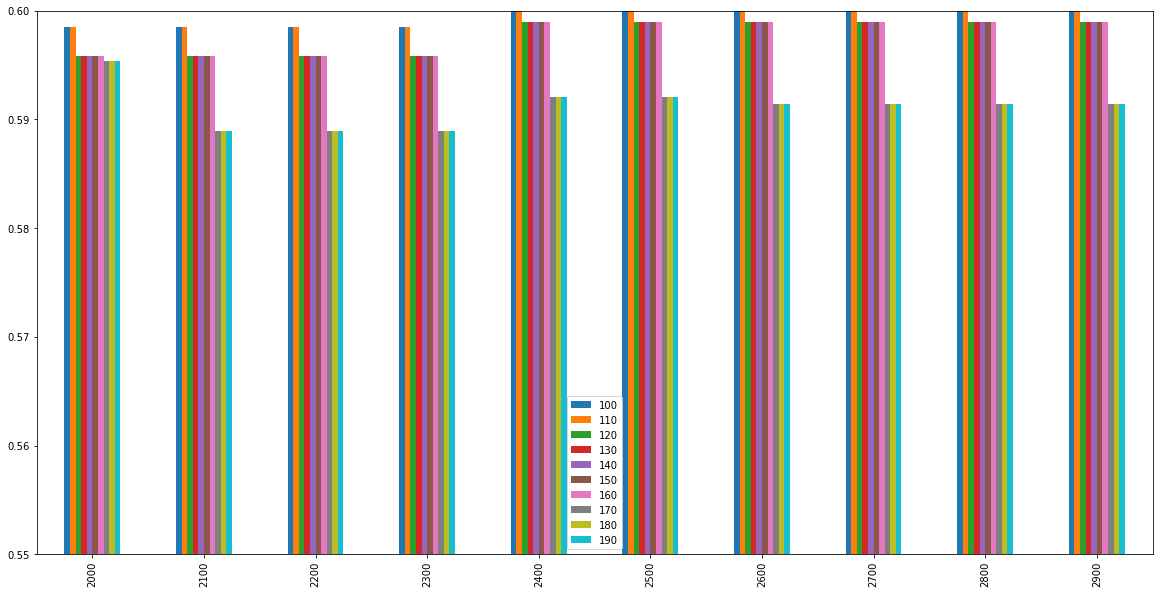

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)




ind=[y for y in mss]
cols=[z for z in msf]
threed=pd.DataFrame(index=ind,columns=cols)
for i in mss:
    for j in msf:
             ds=DecisionTreeClassifier(criterion="entropy", min_samples_split=i, min_samples_leaf=j)    
                             
             fi=ds.fit(X,Y)
             a=fi.score(Z,W)
             print(i,j,a)
             threed.at[i,j]=a

   
threed.plot.bar()
# c=fi.score(Z,W)
# print(c)
plt.ylim(0.55,0.6)
plt.figure(figsize=(20,20)) 

plt.show()



4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

As per the Accuracy plot above and classifier trained, the best accuracy for the model trained is at
min_samples_split = 2000 and min_samples_leaf_values =100.Overall the
best accuracy ranges between 0.59 to 0.60 i.e 59%-60% . Also the best accuracy depends on the
exact split and leaf sizes selected.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

Churn model would prove to be important for the business environment, so the marketing team can
design marketing strategies for the company to reduce customer churning. As we can infer that
customer churn can have a significant impact on the revenue and reputation of the company, churn
model can provide insights for the most significant factors affecting the customer churn or negative
review. The churn model to provide better offers to the customers churning, has a positive effect on
influential customers - the customers who churn on basis of other churning customers review. By
using this model fast immediate effect strategies can be implemented which provide discounts and
incentives to customers likely to churn. For example, offering new devices to the customers using
same equipment for long time. Many strategies can be implemented to prevent customers churn in
future. For example, the reducing outcall rates for non-frequent users, also providing different
incentives on the equipments. The company be benefitted and can think of many ways to prevent
customer churn on basis of churn model.


### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [8]:
import time

s=pd.read_csv(r'D:\Users\DELL\Desktop\FDS\data\cases.csv')

s['YEAR']=pd.to_datetime(s['YEAR'],format="%Y")

s
  #Loading time series dataset and converting it into date-time format

YEAR  YFCASES
0   1700-01-01      5.0
1   1701-01-01     11.0
2   1702-01-01     16.0
3   1703-01-01     23.0
4   1704-01-01     36.0
5   1705-01-01     58.0
6   1706-01-01     29.0
7   1707-01-01     20.0
8   1708-01-01     10.0
9   1709-01-01      8.0
10  1710-01-01      3.0
11  1711-01-01      0.0
12  1712-01-01      0.0
13  1713-01-01      2.0
14  1714-01-01     11.0
15  1715-01-01     27.0
16  1716-01-01     47.0
17  1717-01-01     63.0
18  1718-01-01     60.0
19  1719-01-01     39.0
20  1720-01-01     28.0
21  1721-01-01     26.0
22  1722-01-01     22.0
23  1723-01-01     11.0
24  1724-01-01     21.0
25  1725-01-01     40.0
26  1726-01-01     78.0
27  1727-01-01    122.0
28  1728-01-01    103.0
29  1729-01-01     73.0
..         ...      ...
279 1979-01-01    155.4
280 1980-01-01    154.6
281 1981-01-01    140.4
282 1982-01-01    115.9
283 1983-01-01     66.6
284 1984-01-01     45.9
285 1985-01-01     17.9
286 1986-01-01     13.4
287 1987-01-01     29.4
288 1988-01-01    100.2
289 1989-01-01    157.6
290 1990-01-01    142.6
291 1991-01-01    145.7
292 1992-01-01     94.3
293 1993-01-01     54.6
294 1994-01-01     29.9
295 1995-01-01     17.5
296 1996-01-01      8.6
297 1997-01-01     21.5
298 1998-01-01     64.3
299 1999-01-01     93.3
300 2000-01-01    119.6
301 2001-01-01    111.0
302 2002-01-01    104.0
303 2003-01-01     63.7
304 2004-01-01     40.4
305 2005-01-01     29.8
306 2006-01-01     15.2
307 2007-01-01      7.5
308 2008-01-01      2.9

[309 rows x 2 columns]

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

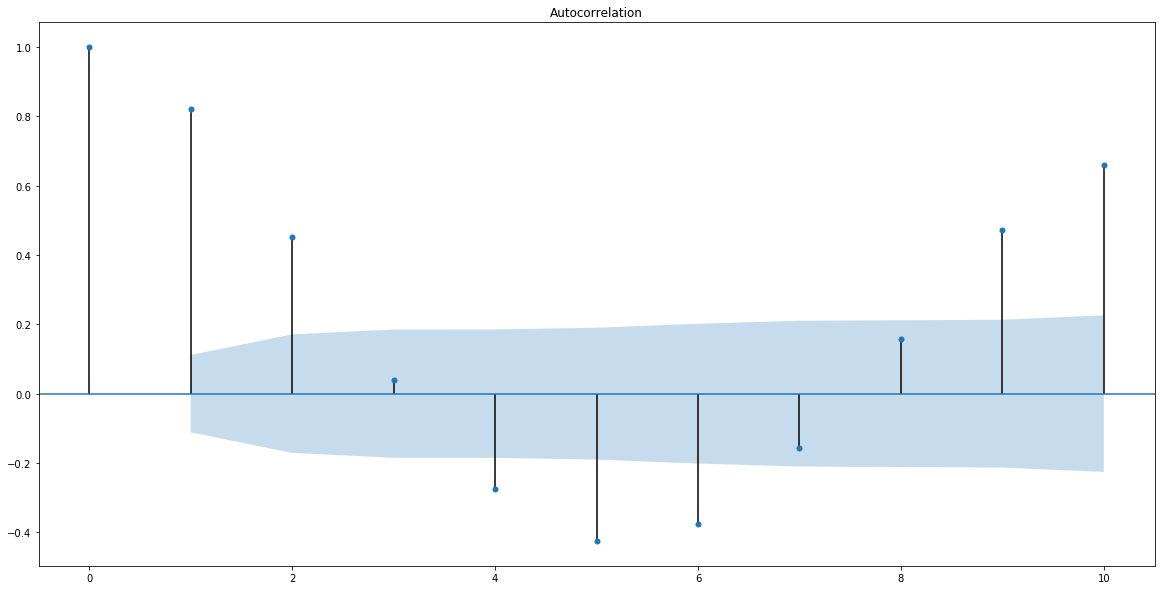

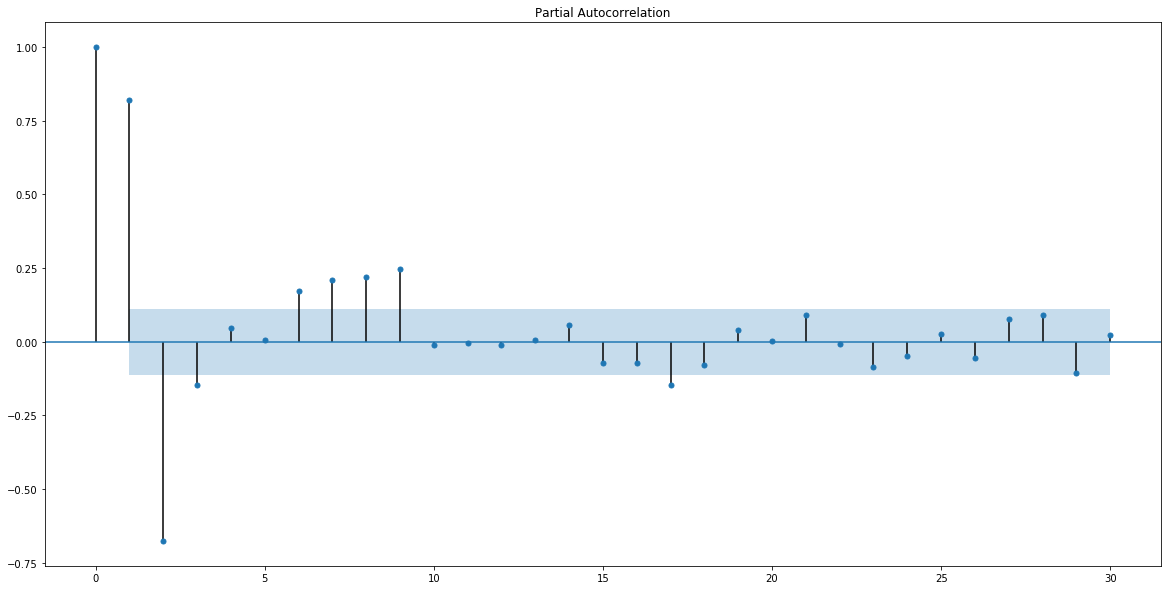

In [9]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv(r'D:\Users\DELL\Desktop\FDS\data\cases.csv', header=0)

# plt.show()
plt.figure(1)
plt.figure(figsize=(10,10))
#autocorrelation_plot(series)
plot_acf(series,lags=10)



plt.show()
plt.figure(2)
plt.figure(figsize=(10,10))
plot_pacf(series,lags=30)
plt.show()

#plotting the autocorrelation and partial autocorrelation plots using the functions mentioned here.


3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


Auto regressive parameter p=2   Moving average parameter q=0 

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [10]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(series,axis=0)
# The Durbin-Watson Statistic 

0.13952892659903304

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


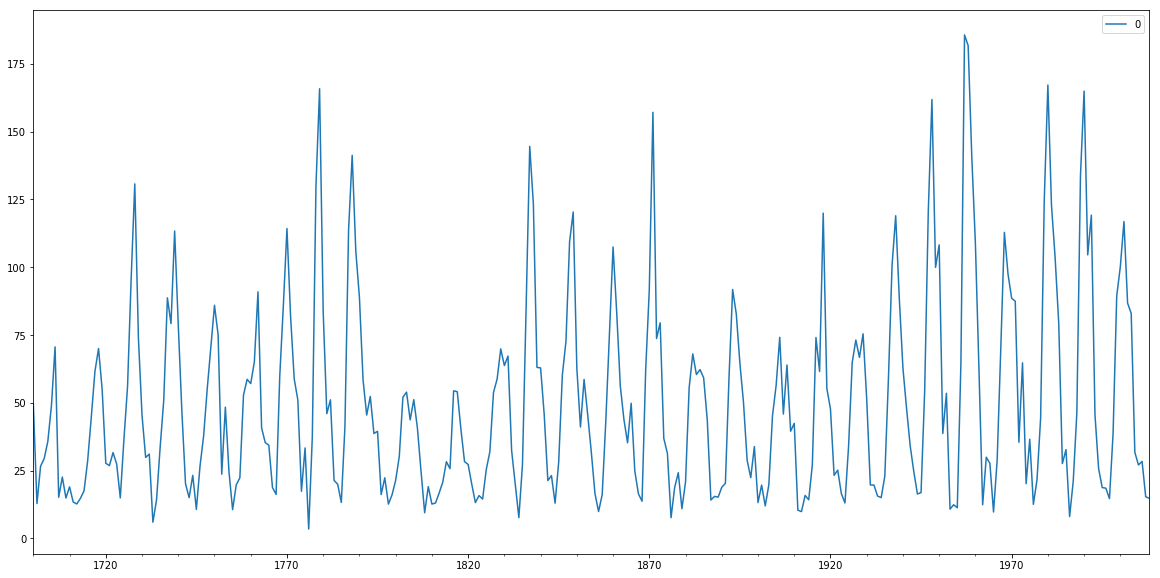

In [11]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(series, order=(2,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())
qwe=pd.DataFrame(model_fit.predict())
r=model_fit.resid



qwe.plot()
plt.show()
#ARMA modelling

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



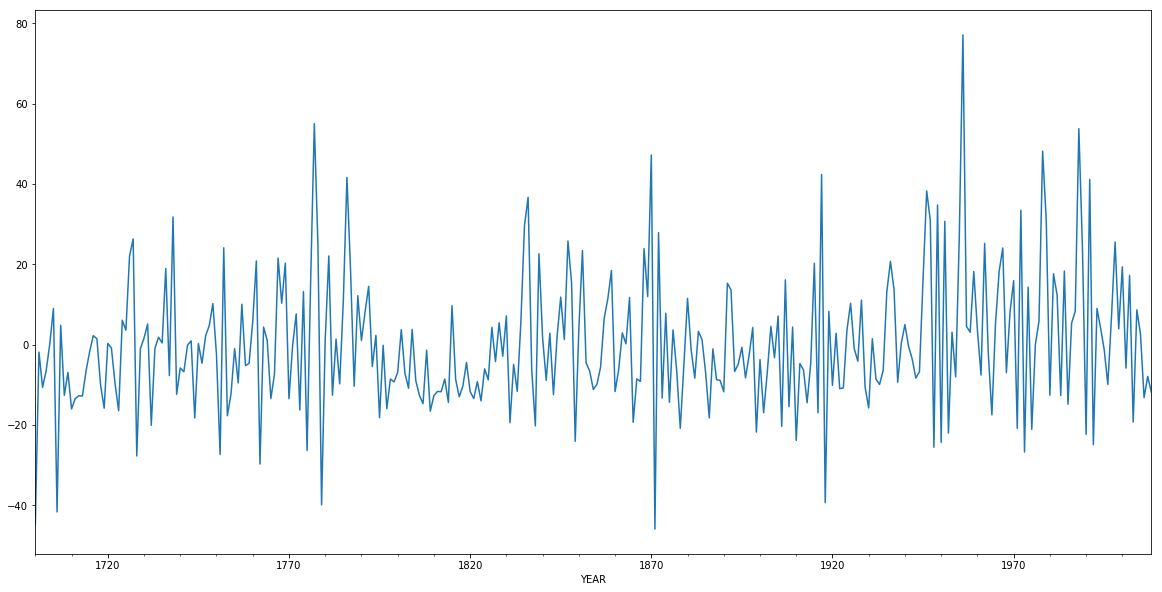

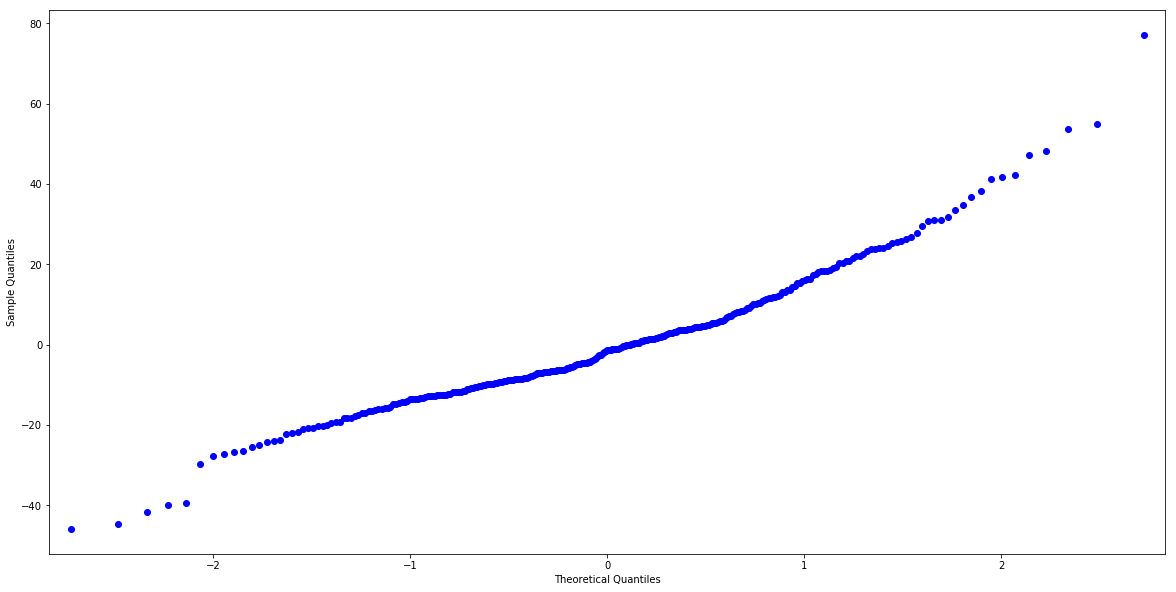

NormaltestResult(statistic=41.735978470764536, pvalue=8.6526159272383216e-10)

In [12]:
import scipy.stats as sta
import statsmodels.api as sm
res = model_fit.resid 
res.plot()


fig = sm.qqplot(res)
plt.show()
sta.normaltest(res)

#qq-plotting

As the data is not normally distributed one can say that null hypothesis and qq-plot does not align from the output below.

7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


In [13]:


import statsmodels.tsa.stattools

r,q,p=statsmodels.tsa.stattools.acf(res, unbiased=False, nlags=40, qstat=True, fft=False, alpha=None, missing='none')
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

#The lags, autocorrelation, Q statistic, Prob>Q are calculated here.

            AC          Q  Prob(>Q)
lag                                
1.0  -0.085220   2.265967  0.132244
2.0   0.103691   5.631597  0.059857
3.0  -0.027833   5.874881  0.117859
4.0   0.091123   8.491077  0.075158
5.0   0.019010   8.605310  0.125881
6.0   0.031321   8.916436  0.178332
7.0   0.044485   9.546133  0.215785
8.0  -0.034337   9.922564  0.270503
9.0   0.185690  20.967735  0.012794
10.0  0.191608  32.767489  0.000298
11.0  0.190385  44.456229  0.000006
12.0  0.121693  49.247960  0.000002
13.0 -0.016219  49.333362  0.000004
14.0  0.014986  49.406524  0.000008
15.0 -0.063197  50.711971  0.000009
16.0  0.039730  51.229685  0.000015
17.0  0.009577  51.259868  0.000027
18.0 -0.073645  53.050927  0.000026
19.0  0.076469  54.988661  0.000023
20.0 -0.006827  55.004159  0.000041
21.0  0.088818  57.636422  0.000029
22.0  0.120485  62.497132  0.000009
23.0  0.103328  66.084641  0.000005
24.0 -0.085728  68.562758  0.000004
25.0  0.013730  68.626547  0.000006
26.0 -0.036183  69.071117  0

Our model is an improvement. As we can see from the Prob values above that only 8 points are contributing toward the autocorrelation while the majority are not.

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



1990-01-01    164.966862
1991-01-01    135.687644
1992-01-01     89.897721
1993-01-01     46.380527
1994-01-01     17.392712
1995-01-01      7.045328
1996-01-01     12.615854
1997-01-01     27.487447
1998-01-01     44.333012
1999-01-01     57.519242
2000-01-01     64.257378
2001-01-01     64.548148
2002-01-01     60.312821
2003-01-01     54.222725
2004-01-01     48.669821
2005-01-01     45.141108
2006-01-01     44.057453
2007-01-01     44.980232
2008-01-01     47.009673
Freq: AS-JAN, dtype: float64


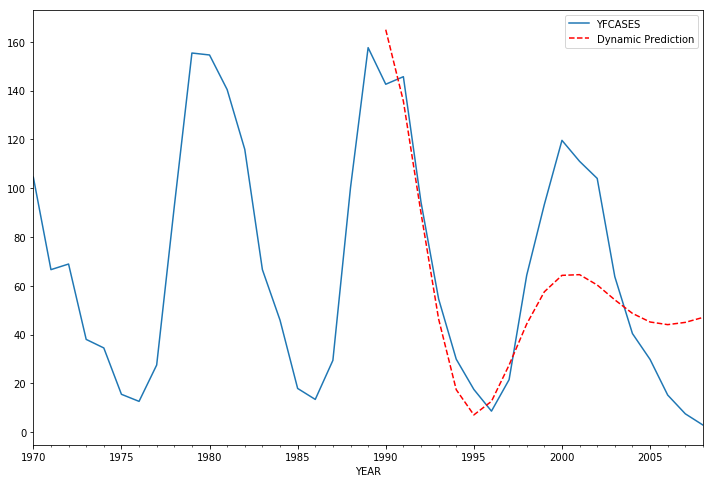

In [18]:
abc=model_fit.predict('1990-01-01','2008-01-01',dynamic=True)
print(abc)   

ax = series.ix['1970':'2008'].plot(figsize=(12,8))
ax = abc.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
plt.show()
ax.axis((-20.0, 38.0, -4.0, 200.0));

#The prediction is computed here 

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [15]:
m=abc
np.mean(series.subtract(m))
# The mean forecast error

4.730225928780894

In [16]:

mae=np.mean(np.abs(np.mean(series.subtract(m)))/m)
print(mae)
# The mean absolute error

0.14342937109740697
